In [3]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import argrelmax
from scipy.ndimage.filters import gaussian_filter1d
from tqdm import tqdm
from scipy import sparse
from scipy.signal import find_peaks, peak_prominences
from scipy.signal import chirp, find_peaks, peak_widths
from scipy.sparse.linalg import spsolve
from scipy.signal import argrelmax
from scipy.ndimage.filters import gaussian_filter1d

In [4]:
X = pd.read_csv('video_raw/2801_sam/list_sam.csv')
phone='Samsung galaxy Note 8'
name='Sajid Ahmed'
val=3

In [5]:
%matplotlib notebook
test=X
# plt.plot(test)
# plt.xlabel('Sampling Point')
# plt.ylabel('Magnitude(AU)')
# plt.show()

<IPython.core.display.Javascript object>


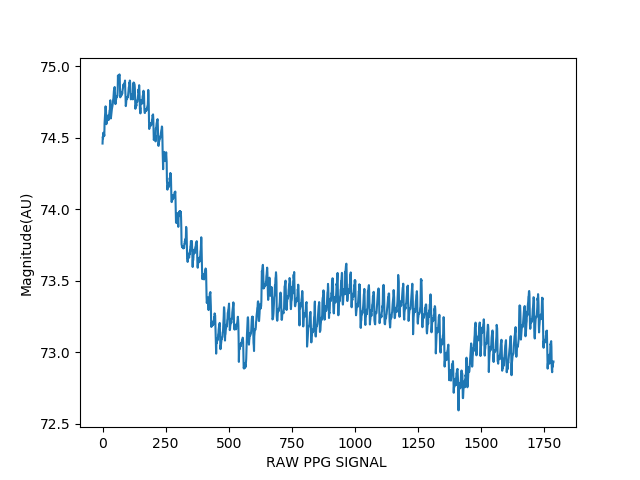

In [6]:
%matplotlib notebook
t=X.T
t=np.asarray(X)
plt.plot(t[val])
plt.xlabel('RAW PPG SIGNAL ')
plt.ylabel('Magnitude(AU)')
plt.show()

In [10]:
#Gausian
%matplotlib notebook
g_signal=gaussian_filter(test,sigma=0.5,cval=0.5, truncate=4.0)

# plt.figure(figsize=(10,8))
# plt.xlabel('Gausian+RAW PPG GRAPH')
# plt.plot(g_signal[val])

In [11]:
#correcting baseline
def baseline_als(y, lam, p, niter=10):
    L = len(y)
    D = sparse.csc_matrix(np.diff(np.eye(L), 2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

In [12]:
%matplotlib notebook
asx =[]
Corrected_base =[]
for i in range(len(g_signal)):
    asx.append(g_signal[i].flatten())
    base=asx[i]-baseline_als(asx[i], 1000, 0.05)
    Corrected_base.append(base)     
    
# plt.figure(figsize=(10,8))
# plt.xlabel('Corrected Baseline PPG GRAPH')
# plt.plot(Corrected_base[val])

In [13]:
%matplotlib notebook
from scipy.signal import savgol_filter
sig_filter = savgol_filter(Corrected_base, 5, polyorder = 2,deriv=0)
# Plot second derivative

# plt.figure(figsize=(10,8))
# with plt.style.context(('ggplot')):
#     plt.plot(sig_filter[val])
#     plt.xlabel('')
#     plt.ylabel('')
#     plt.show()

<IPython.core.display.Javascript object>


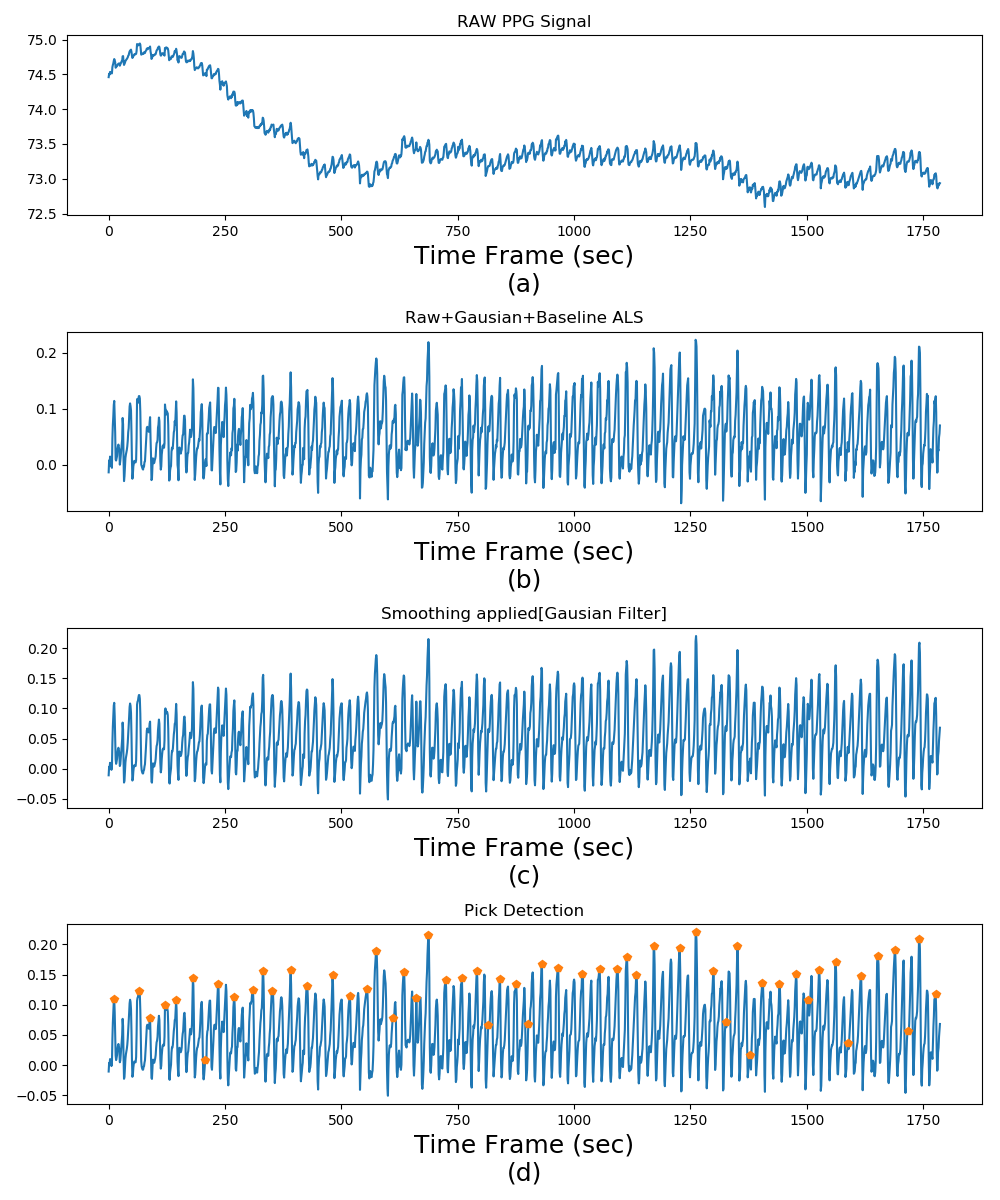

In [14]:
%matplotlib notebook
from scipy.ndimage.filters import gaussian_filter1d
from matplotlib import gridspec

fig = plt.figure(figsize=(10,12))
gs = gridspec.GridSpec(4, 1) 

ax0 = plt.subplot(gs[0])
ax0.set_title('RAW PPG Signal')
ax0.plot(t[val])
ax0.set_xlabel('Time Frame (sec)\n(a)',fontsize=18)
ax0.set_ylabel('',fontsize=18)

ax1 = plt.subplot(gs[1])
ax1.set_title('Raw+Gausian+Baseline ALS')
ax1.plot(Corrected_base[val])
ax1.set_xlabel('Time Frame (sec)\n(b)',fontsize=18)
ax1.set_ylabel('',fontsize=18)

smoothed_signal = gaussian_filter1d(Corrected_base, 0.55)
ax2 = plt.subplot(gs[2])
ax2.set_title('Smoothing applied[Gausian Filter]')
ax2.plot(smoothed_signal[val])
ax2.set_xlabel('Time Frame (sec)\n(c)',fontsize=18)
ax2.set_ylabel('' ,fontsize=18)
plt.tight_layout()
plt.show()

peaks2, _ = find_peaks(smoothed_signal[val], distance=20)
s_height2 = peak_prominences(smoothed_signal[val], peaks2)[0]
contour_heights2 = smoothed_signal[val][peaks2] - s_height2

ax3 = plt.subplot(gs[3])
ax3.set_title('Pick Detection')
ax3.plot(smoothed_signal[val])
ax3.plot(peaks2, smoothed_signal[val][peaks2], "p")
ax3.set_xlabel('Time Frame (sec)\n(d)',fontsize=18)
ax3.set_ylabel('',fontsize=18)
plt.tight_layout()
plt.show()

#fig.savefig('figures/'+str(phone)+'_'+str(name)+str(val)+'_.png', bbox_inches='tight')

In [15]:
len(peaks2)

56

In [16]:
max_vt = np.amax(t[val])
min_vt = np.amin(t[val])

min_vc = np.amin(Corrected_base[val])
max_vc = np.amax(Corrected_base[val])

<IPython.core.display.Javascript object>


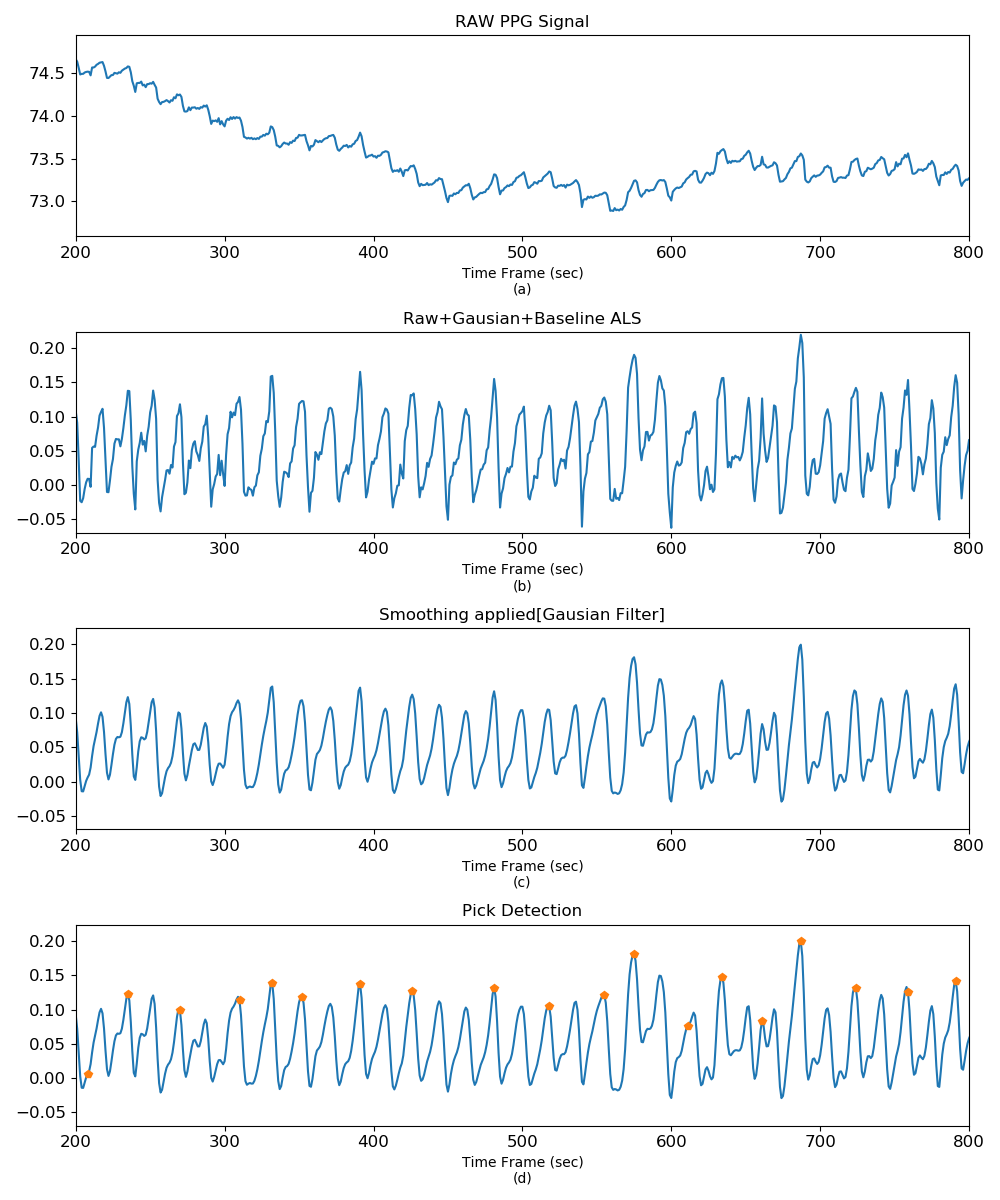

In [17]:
%matplotlib notebook
from scipy.ndimage.filters import gaussian_filter1d
from matplotlib import gridspec

fig = plt.figure(figsize=(10,12))
gs = gridspec.GridSpec(4, 1) 

ax0 = plt.subplot(gs[0])
ax0.set_title('RAW PPG Signal')
ax0.plot(t[val])
ax0.set_xlabel('Time Frame (sec)\n(a)')
ax0.set_ylabel('')
ax0.tick_params(grid_alpha=2.5,labelsize ='large')
plt.axis([200,800,min_vt,max_vt])

ax1 = plt.subplot(gs[1])
ax1.set_title('Raw+Gausian+Baseline ALS')
ax1.plot(Corrected_base[val])
ax1.set_xlabel('Time Frame (sec)\n(b)')
ax1.set_ylabel('')
ax1.tick_params(grid_alpha=2.5,labelsize ='large')
plt.axis([200,800,min_vc,max_vc])

smoothed_signal = gaussian_filter1d(Corrected_base, 1.2)
ax2 = plt.subplot(gs[2]) 
ax2.set_title('Smoothing applied[Gausian Filter]')
ax2.plot(smoothed_signal[val])
ax2.set_xlabel('Time Frame (sec)\n(c)')
ax2.set_ylabel('')
plt.tight_layout()
plt.axis([200,800,min_vc,max_vc])
ax2.tick_params(grid_alpha=2.5,labelsize ='large')
plt.show()

ax3 = plt.subplot(gs[3])
ax3.set_title('Pick Detection')
ax3.plot(smoothed_signal[val])
ax3.plot(peaks2, smoothed_signal[val][peaks2], "p")
ax3.set_xlabel('Time Frame (sec)\n(d)')
ax3.set_ylabel('')
plt.tight_layout()
plt.axis([200,800,min_vc,max_vc])
ax3.tick_params(grid_alpha=2.5,labelsize ='large')
plt.show()

fig.savefig('figures/'+str(phone)+'_'+str(name)+str(val)+'zoom_.png', bbox_inches='tight')

In [18]:
xm1 = pd.read_csv('video_raw/2801_mi/list_mi.csv')
xm2 = pd.read_csv('video_raw/2801_sam/list_sam.csv')
xm3 = pd.read_csv('video_raw/2801_onp/list_onp.csv')
val=7
mr1=xm1.T
mr1=np.asarray(xm1)

mr2=xm2.T
mr2=np.asarray(xm2)

mr3=xm3.T
mr3=np.asarray(xm3)

<IPython.core.display.Javascript object>


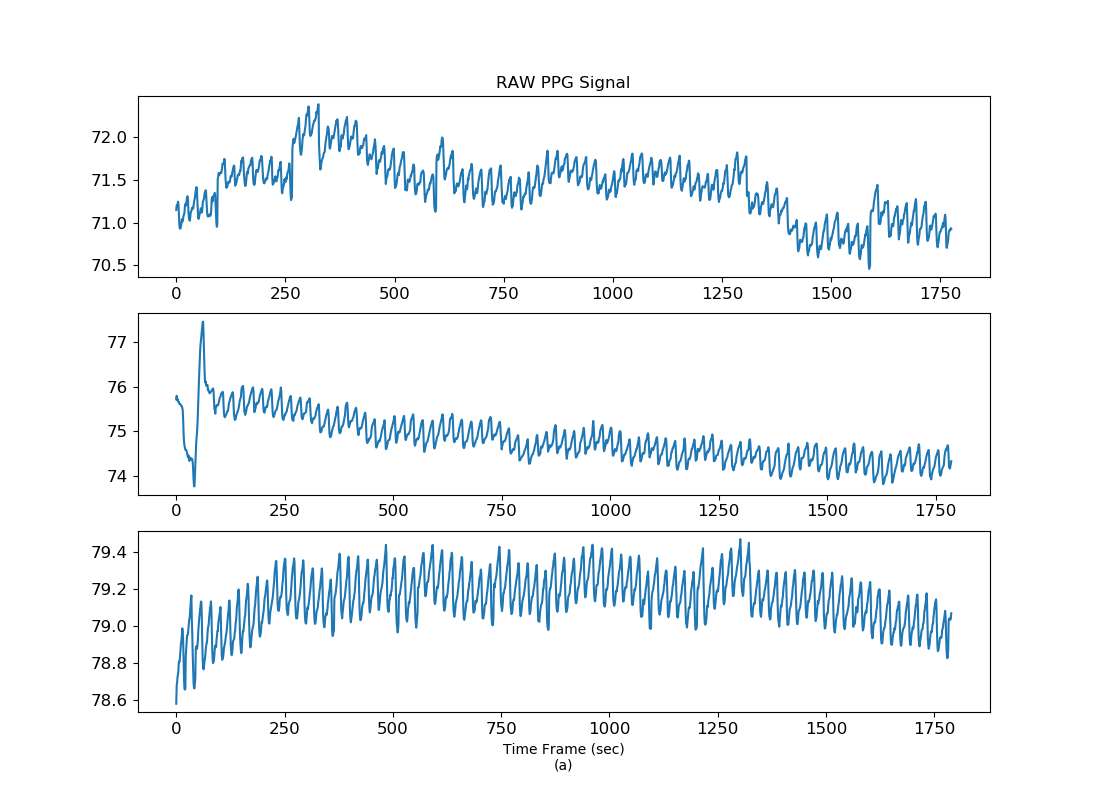

In [19]:
%matplotlib notebook
fig = plt.figure(figsize=(11,8))
gs = gridspec.GridSpec(3, 1) 

ax0 = plt.subplot(gs[0])
ax0.set_title('RAW PPG Signal')
ax0.plot(mr1[val])
ax0.tick_params(grid_alpha=2.5,labelsize ='large')

ax0.set_ylabel('')
plt.show()

ax1 = plt.subplot(gs[1])
ax1.plot(mr2[val])
ax1.set_ylabel('')
ax1.tick_params(grid_alpha=2.5,labelsize ='large')
plt.show()

ax2 = plt.subplot(gs[2])
ax2.plot(mr3[val])
ax2.set_xlabel('Time Frame (sec)\n(a)')
ax2.set_ylabel('')
ax2.tick_params(grid_alpha=2.5,labelsize ='large')
plt.show()
fig.savefig('figures/RAW 3 Tanzilur Rahman.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


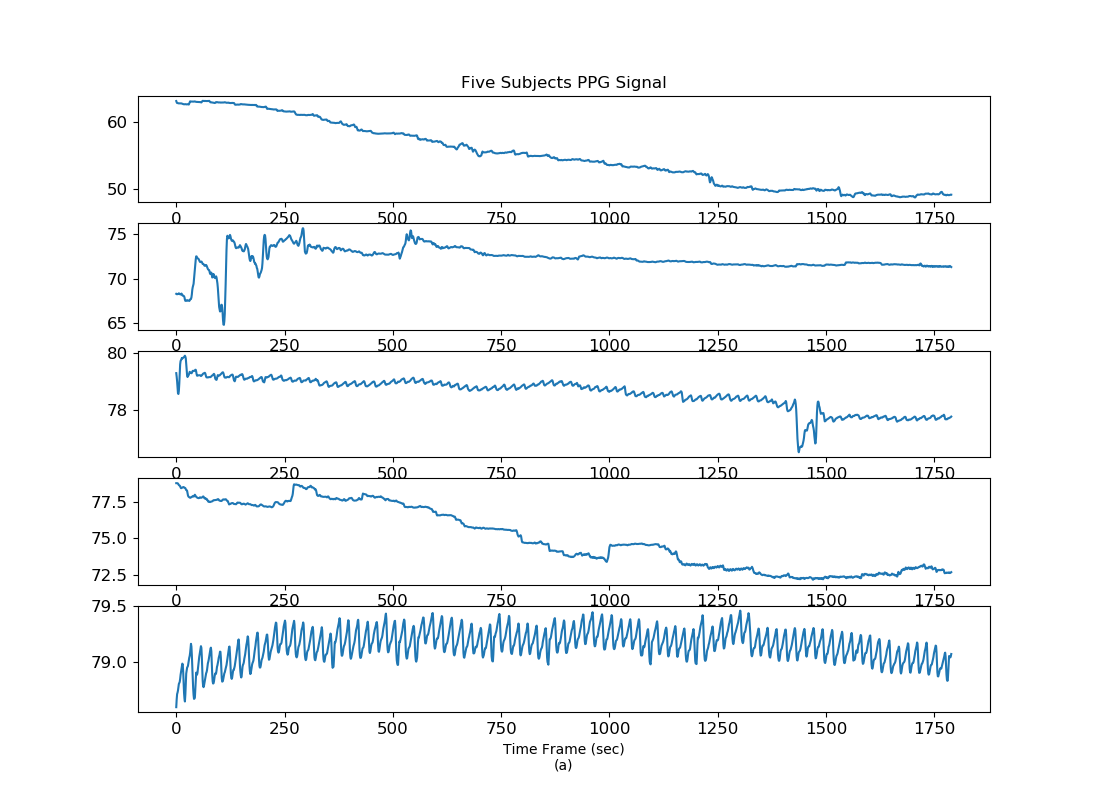

In [20]:
%matplotlib notebook
fig = plt.figure(figsize=(11,8))
gs = gridspec.GridSpec(5, 1) 

from scipy.signal import savgol_filter
sig_filter1 = savgol_filter(mr3[3], 5, polyorder = 2,deriv=0)
sig_filter2 = savgol_filter(mr3[4], 5, polyorder = 2,deriv=0)
sig_filter3 = savgol_filter(mr3[6], 5, polyorder = 2,deriv=0)
sig_filter4 = savgol_filter(mr3[5], 5, polyorder = 2,deriv=0)
sig_filter5 = savgol_filter(mr3[7], 5, polyorder = 2,deriv=0)




ax0 = plt.subplot(gs[0])
ax0.set_title('Five Subjects PPG Signal')
ax0.plot(sig_filter1)
ax0.tick_params(grid_alpha=2.5,labelsize ='large')

ax0.set_ylabel('')
plt.show()

ax1 = plt.subplot(gs[1])
ax1.plot(sig_filter2)
ax1.set_ylabel('')
ax1.tick_params(grid_alpha=2.5,labelsize ='large')
plt.show()

ax2 = plt.subplot(gs[2])
ax2.plot(sig_filter3)
ax2.set_xlabel('Time Frame (sec)\n(a)')
ax2.set_ylabel('')
ax2.tick_params(grid_alpha=2.5,labelsize ='large')
plt.show()

ax3 = plt.subplot(gs[3])
ax3.plot(sig_filter4)
ax3.set_xlabel('Time Frame (sec)\n(a)')
ax3.set_ylabel('')
ax3.tick_params(grid_alpha=2.5,labelsize ='large')
plt.show()

ax4 = plt.subplot(gs[4])
ax4.plot(sig_filter5)
ax4.set_xlabel('Time Frame (sec)\n(a)')
ax4.set_ylabel('')
ax4.tick_params(grid_alpha=2.5,labelsize ='large')
plt.show()

#fig.savefig('figures/5 Subjects baseline.png', bbox_inches='tight')

In [21]:
val=7

<IPython.core.display.Javascript object>


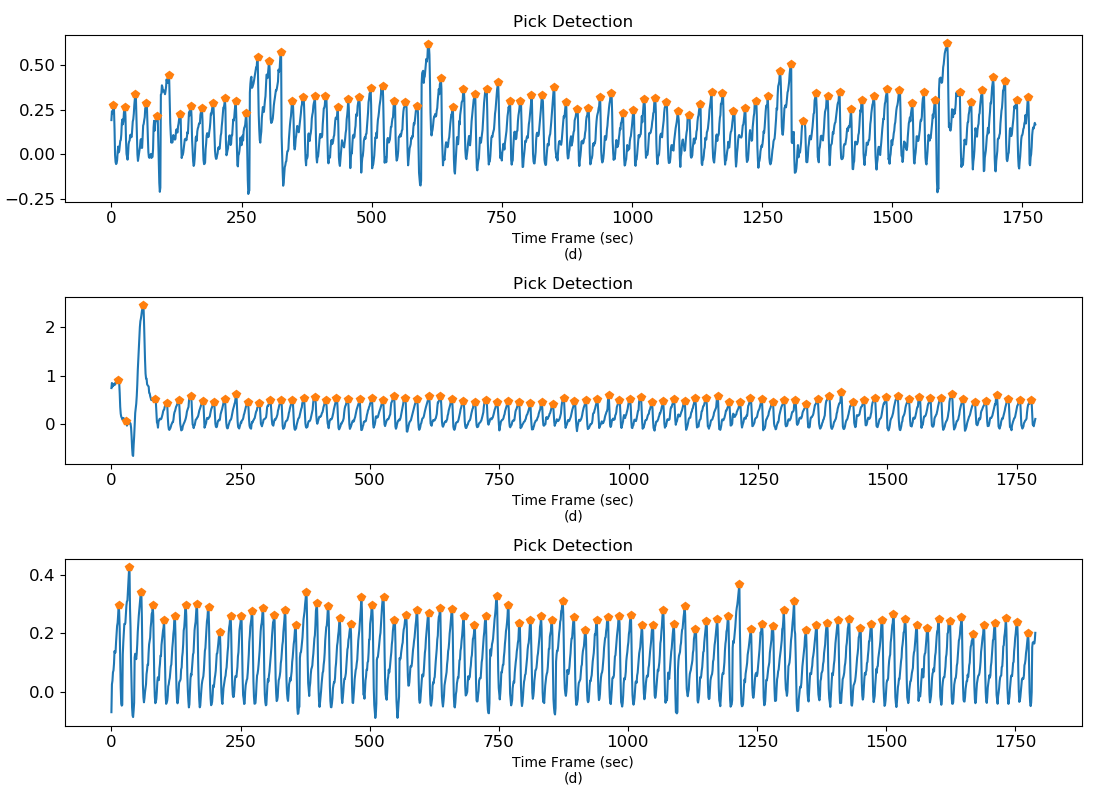

In [22]:
%matplotlib notebook
fig = plt.figure(figsize=(11,8))
gs = gridspec.GridSpec(3, 1) 

sig_filter1 = mr1[val]-baseline_als(mr1[val], 10000, 0.05)
sig_filter2 = mr2[val]-baseline_als(mr2[val], 10000, 0.05)
sig_filter3 = mr3[val]-baseline_als(mr3[val], 10000, 0.05)

peaks1, _= find_peaks(sig_filter1, distance=15)
peaks2, _= find_peaks(sig_filter2, distance=15)
peaks3, _= find_peaks(sig_filter3, distance=15)

ax0 = plt.subplot(gs[0])
ax0.set_title('Pick Detection')
ax0.plot(sig_filter1)
ax0.plot(peaks1, sig_filter1[peaks1], "p")
ax0.set_xlabel('Time Frame (sec)\n(d)')
ax0.set_ylabel('')
ax0.tick_params(grid_alpha=2.5,labelsize ='large')
plt.tight_layout()
#plt.axis([200,800,min_vc,max_vc])

ax1 = plt.subplot(gs[1])
ax1.set_title('Pick Detection')
ax1.plot(sig_filter2)
ax1.plot(peaks2, sig_filter2[peaks2], "p")
ax1.set_xlabel('Time Frame (sec)\n(d)')
ax1.set_ylabel('')
ax1.tick_params(grid_alpha=2.5,labelsize ='large')
plt.tight_layout()
#plt.axis([200,800,min_vc,max_vc])

ax2 = plt.subplot(gs[2])
ax2.set_title('Pick Detection')
ax2.plot(sig_filter3)
ax2.plot(peaks3, sig_filter3[peaks3], "p")
ax2.set_xlabel('Time Frame (sec)\n(d)')
ax2.set_ylabel('')
plt.tight_layout()
ax2.tick_params(grid_alpha=2.5,labelsize ='large')
#plt.axis([200,800,min_vc,max_vc])
plt.show()

fig.savefig('figures/peak Detection.png', bbox_inches='tight')

<IPython.core.display.Javascript object>


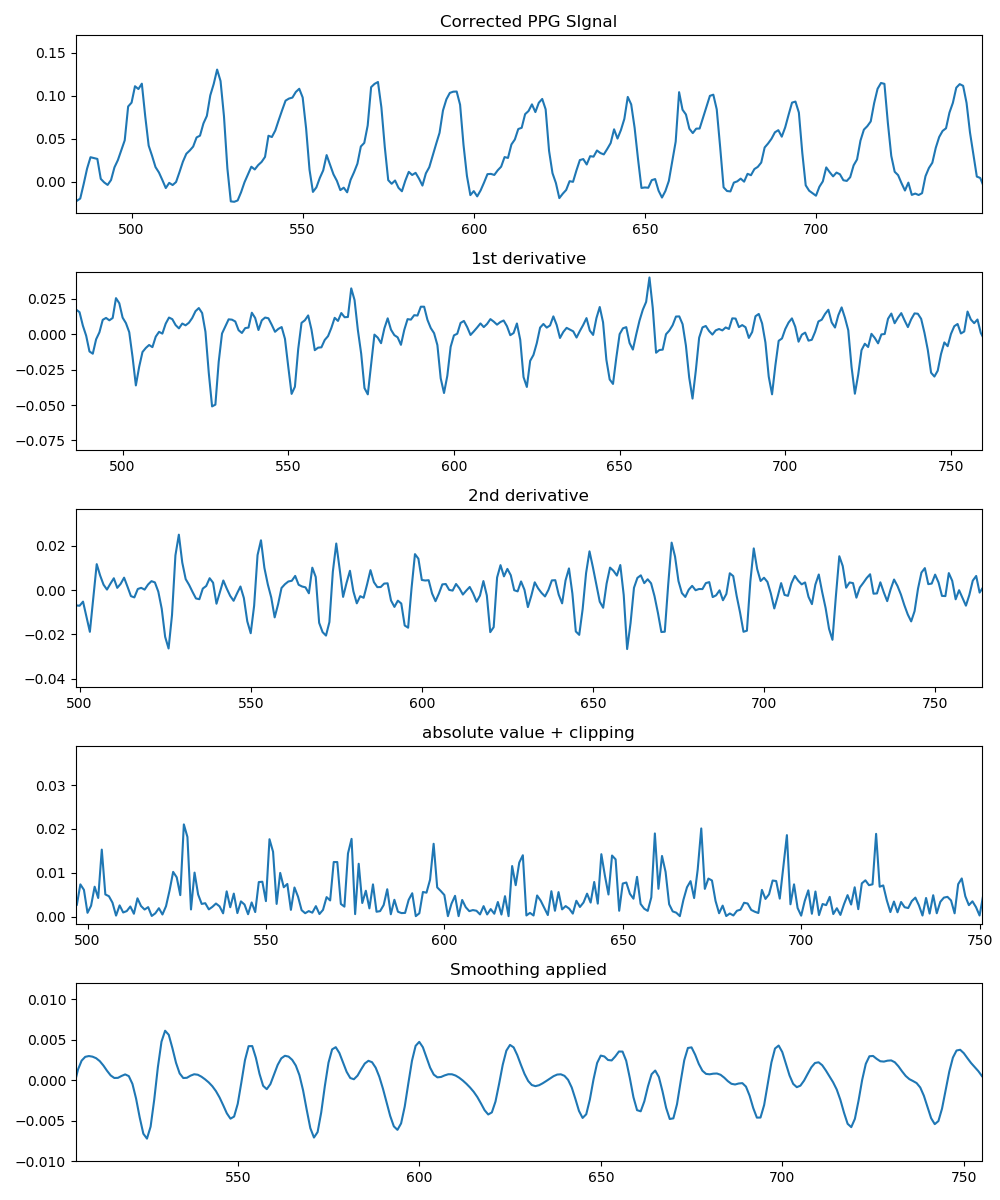

In [35]:
%matplotlib notebook
c=Corrected_base[2]

fig = plt.figure(figsize=(10,12))
gs = gridspec.GridSpec(5, 1) 

ax0 = plt.subplot(gs[0])
ax0.set_title('Corrected PPG SIgnal')
ax0.plot(c)

base_signal_1stdev = np.gradient(c)
ax1 = plt.subplot(gs[1])
ax1.set_title('1st derivative')
ax1.plot(base_signal_1stdev)

base_signal_2nddev = np.gradient(base_signal_1stdev)
ax2 = plt.subplot(gs[2])
ax2.set_title('2nd derivative')
ax2.plot(base_signal_2nddev)

base_signal_2nddev_clipped = np.clip(np.abs(np.gradient(base_signal_2nddev)), 0.0001, 10)
ax3 = plt.subplot(gs[3])
ax3.set_title('absolute value + clipping')
ax3.plot(base_signal_2nddev_clipped)

smoothed_signal = gaussian_filter1d(base_signal_2nddev, 2.4)
ax4 = plt.subplot(gs[4])
ax4.set_title('Smoothing applied')
ax4.plot(smoothed_signal)

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


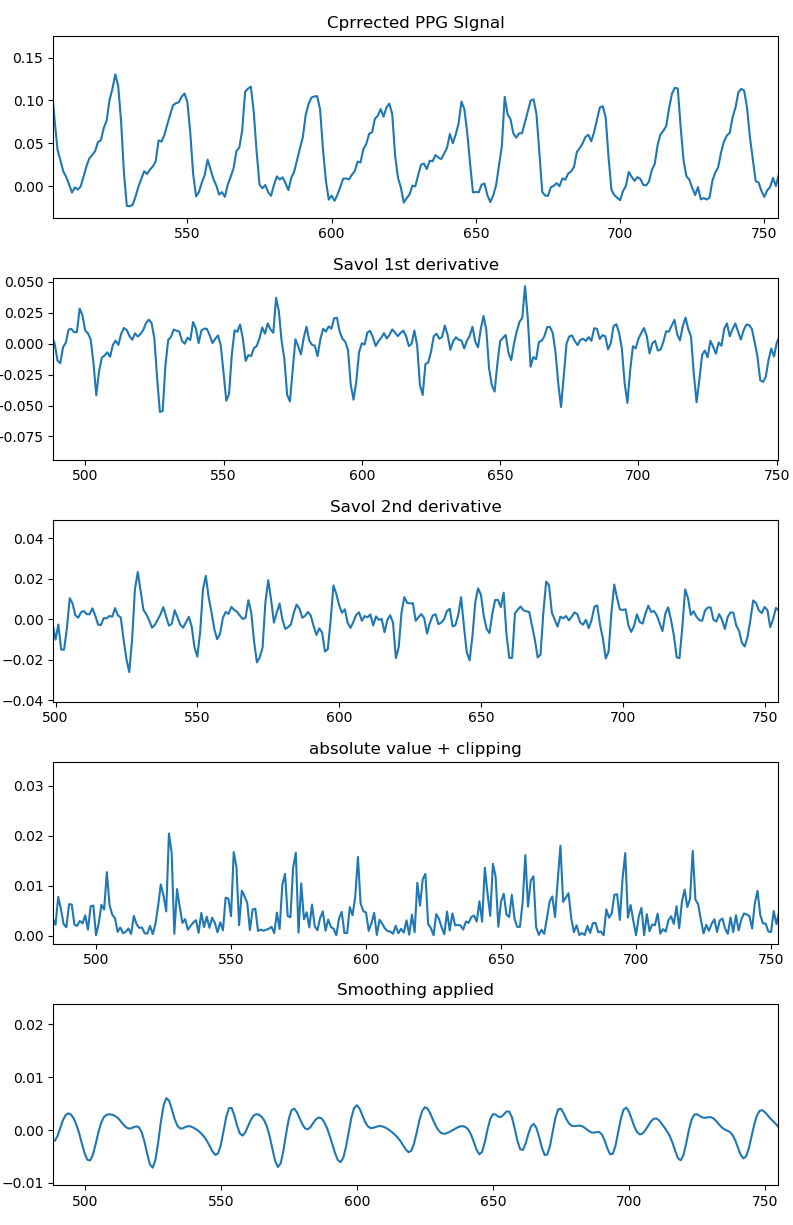

In [36]:
%matplotlib notebook

fig = plt.figure(figsize=(10,12))
gs = gridspec.GridSpec(5, 1) 

ax0 = plt.subplot(gs[0])
ax0.set_title('Cprrected PPG SIgnal')
ax0.plot(c)

base_signal_1stdev = savgol_filter(c, 5, polyorder = 3,deriv=1)
ax1 = plt.subplot(gs[1])
ax1.set_title('Savol 1st derivative')
ax1.plot(base_signal_1stdev)

base_signal_2nddev = savgol_filter(c, 5, polyorder = 3,deriv=2)
ax2 = plt.subplot(gs[2])
ax2.set_title('Savol 2nd derivative')
ax2.plot(base_signal_2nddev)

base_signal_2nddev_clipped = np.clip(np.abs(np.gradient(base_signal_2nddev)), 0.0001, 10)
ax3 = plt.subplot(gs[3])
ax3.set_title('absolute value + clipping')
ax3.plot(base_signal_2nddev_clipped)

smoothed_signal = gaussian_filter1d(base_signal_2nddev, 2.4)
ax4 = plt.subplot(gs[4])
ax4.set_title('Smoothing applied')
ax4.plot(smoothed_signal)

plt.tight_layout()
plt.show()